In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns 

In [89]:
res1 = {'resnet18': './results/KFOLD_5_resnet18_s42/summary_test.csv' }
res2 = {'resnet50': './results/KFOLD_5_resnet50_s42/summary_test.csv'}
res3 = {'effnetb0': './results/KFOLD_5_effnetb0_s42/summary_test.csv'}
res4 = {'densenet121': './results/KFOLD_5_densenet121_s42/summary_test.csv'}

res5 = {'resnet18': './eval_results/KFOLD_5_resnet18_MIDOG2/summary.csv' }
res6 = {'resnet50': './eval_results/KFOLD_5_resnet50_MIDOG2/summary.csv'}
res7 = {'effnetb0': './eval_results/KFOLD_5_effnetb0_MIDOG2/summary.csv'}
res8 = {'densenet121': './eval_results/KFOLD_5_densenet121_MIDOG2/summary.csv'}

res9 = {'resnet18': './results/KFOLD_10_resnet18_s42/summary_test.csv' }
res10 = {'resnet50': './results/KFOLD_10_resnet50_s42/summary_test.csv'}
res11 = {'effnetb0': './results/KFOLD_10_effnetb0_s42/summary_test.csv'}
res12 = {'densenet121': './results/KFOLD_10_densenet121_s42/summary_test.csv'}

res13 = {'resnet18': './eval_results/KFOLD_10_resnet18_MIDOG2/summary.csv' }
res14 = {'resnet50': './eval_results/KFOLD_10_resnet50_MIDOG2/summary.csv'}
res15 = {'effnetb0': './eval_results/KFOLD_10_effnetb0_MIDOG2/summary.csv'}
res16 = {'densenet121': './eval_results/KFOLD_10_densenet121_MIDOG2/summary.csv'}

In [90]:
def combine_results(res_dicts):
    dfs = []
    for res in res_dicts:
        for key, value in res.items():
            df = pd.read_csv(value).iloc[:, 1:]
            df['type'] = key
        dfs.append(df)
    dfs = pd.concat(dfs, axis=0)
    return dfs 

In [91]:
test_df = combine_results((res1, res2, res3, res4))
infer_df = combine_results((res5, res6, res7, res8))
test_10_df = combine_results((res9, res10, res11, res12))
infer_10_df = combine_results((res13, res14, res15, res16))

In [35]:
infer_df

,BinaryAccuracy,BinaryAUROC,BinaryF1Score,BinaryPrecision,BinaryRecall,error,type
0,0.561457,0.577266,0.306515,0.647595,0.200771,0.438471,resnet18
1,0.625116,0.668263,0.409153,0.855274,0.268895,0.374756,resnet18
2,0.641683,0.695739,0.512041,0.747226,0.389460,0.358277,resnet18
3,0.641559,0.700844,0.521811,0.732853,0.405141,0.358413,resnet18
4,0.621828,0.681987,0.426461,0.795926,0.291260,0.378112,resnet18
0,0.624930,0.695098,0.404727,0.865263,0.264139,0.374977,resnet50
1,0.642365,0.703477,0.451674,0.868960,0.305141,0.357513,resnet50
2,0.605882,0.712745,0.393082,0.765823,0.264396,0.394001,resnet50
3,0.671279,0.769703,0.526288,0.864571,0.378278,0.328631,resnet50
4,0.656202,0.740826,0.503717,0.830724,0.361440,0.343710,resnet50


In [46]:
# palette = ['#ff6f59', '#254441', '#43aa8b', '#b2b09b']
palette = ['#ed6a5a', '#f4f1bb', '#9bc1bc', '#5d576b']
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, context='notebook', palette=palette)

In [76]:
def show_kfold_result(results, var_name, save_name, ylabel='F1-Score', xlabel='',ylim=(0, 1)):

    fig, ax = plt.subplots()
    sns.barplot(results, x='type', y=var_name, ax=ax, errorbar='sd')
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_ylim(ylim)
    # ax.set_yticks([0., 0.2, 0.4, 0.6, 0.8])
    ax.set_xticklabels(('Resnet18', 'Resnet50', 'Efficientnet_b0', 'Densenet121'))
    plt.grid(axis='y')
    plt.savefig(save_name, bbox_inches='tight')
    plt.show()


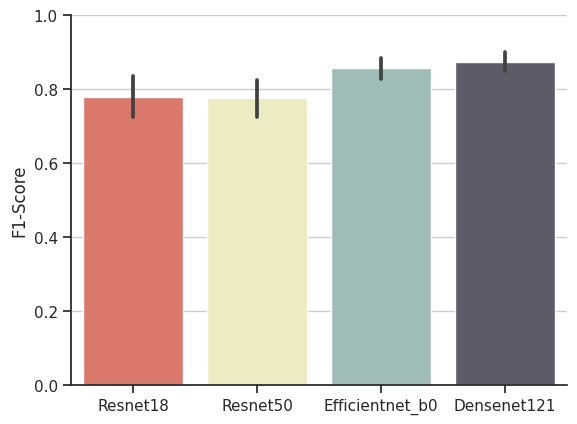

In [75]:
var_name = 'final/test_BinaryF1Score'
save_name = './plots/KFOLD_5_test.jpg'
show_kfold_result(test_df, var_name, save_name)

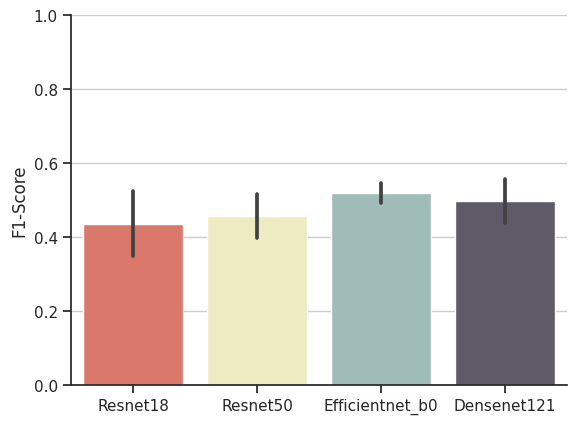

In [85]:
var_name = 'BinaryF1Score'
save_name = './plots/KFOLD_5_inferjpg'
show_kfold_result(infer_df, var_name, save_name)

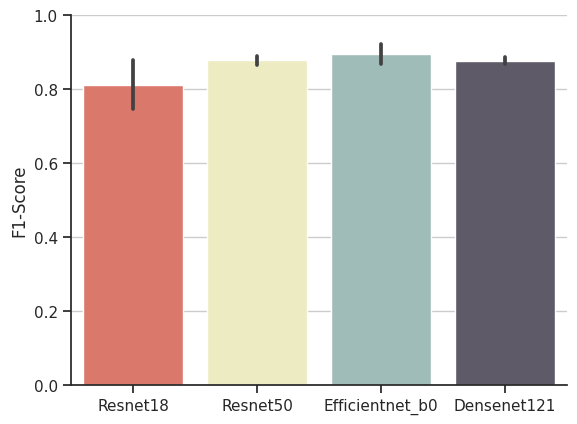

In [86]:
var_name = 'final/test_BinaryF1Score'
save_name = './plots/KFOLD_10_test.jpg'
show_kfold_result(test_10_df, var_name, save_name)

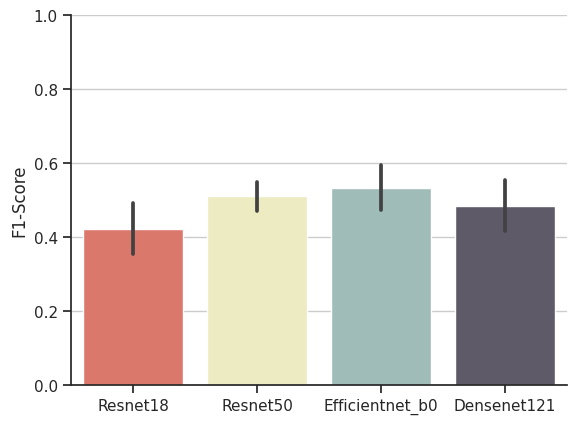

In [93]:
var_name = 'BinaryF1Score'
save_name = './plots/KFOLD_10_infer.jpg'
show_kfold_result(infer_10_df, var_name, save_name)

### Train on MIDOG2 and eval on MIDOG1

In [96]:
res1 = {'resnet18': './results/KFOLD_5_resnet18_M2_s42/summary_test.csv' }
res2 = {'resnet50': './results/KFOLD_5_resnet50_M2_s42/summary_test.csv'}
res3 = {'effnetb0': './results/KFOLD_5_effnetb0_M2_s42/summary_test.csv'}
res4 = {'densenet121': './results/KFOLD_5_densenet121_M2_s42/summary_test.csv'}

res5 = {'resnet18': './eval_results/KFOLD_5_resnet18_MIDOG1/summary.csv' }
res6 = {'resnet50': './eval_results/KFOLD_5_resnet50_MIDOG1/summary.csv'}
res7 = {'effnetb0': './eval_results/KFOLD_5_effnetb0_MIDOG1/summary.csv'}
res8 = {'densenet121': './eval_results/KFOLD_5_densenet121_MIDOG1/summary.csv'}

In [97]:
test_5_df = combine_results((res1, res2, res3, res4))
infer_5_df = combine_results((res5, res6, res7, res8))

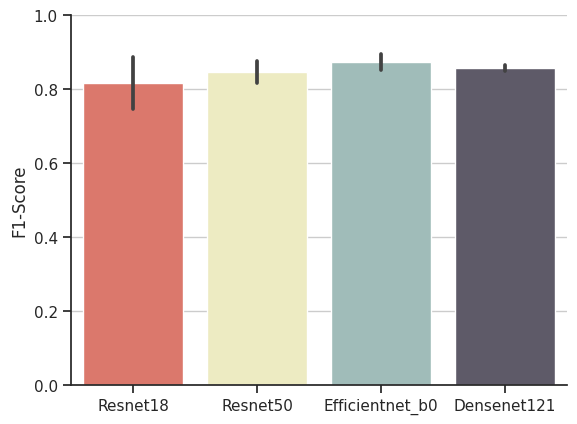

In [98]:
var_name = 'final/test_BinaryF1Score'
save_name = './plots/KFOLD_5_test_M2.jpg'
show_kfold_result(test_5_df, var_name, save_name)

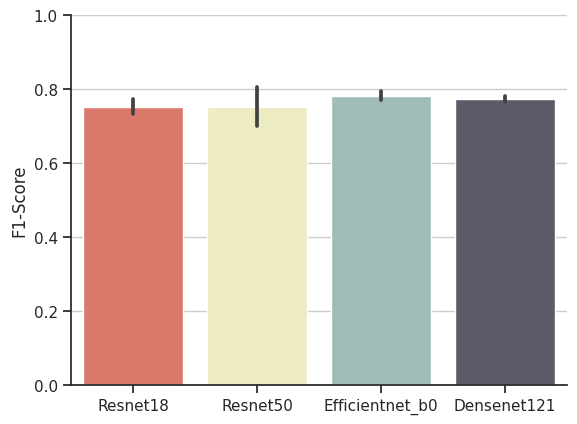

In [99]:
var_name = 'BinaryF1Score'
save_name = './plots/KFOLD_5_infer_M2.jpg'
show_kfold_result(infer_5_df, var_name, save_name)